<a href="https://colab.research.google.com/github/dolmarawat/ClusteredAnalysis/blob/main/Computer_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import warnings
np.warnings = warnings
import math

In [ ]:
import sys
# Define the path where the function.py is located
module_path = "/content/drive/MyDrive/Function"

# Add the path to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import Function as fun

In [ ]:
# Define the file path for the training data
file_path = '/content/drive/MyDrive/Data/'

# Load Data

In [ ]:
import pandas as pd

# Define the file path for the training data
file_path = '/content/drive/MyDrive/Data/'

# Read the file using the file_path with the read_excel function
# Removed the encoding parameter as it is no longer supported in newer pandas versions
df = pd.read_excel(file_path + 'Asia Dataset.xlsx', engine='openpyxl')



# makes df_input explicitly a copy, not a view, of the original df
df_input = df.copy() # Assuming df_input should be a copy of df
df_input = df.drop(['RANK', 'COMPNAME', 'COUNTRY', 'MAIN Business', 'NOTES'], axis=1)
df_input.head(3)

,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,155976.9,-1.2,1,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3
1,147571.8,-4.9,2,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8
2,143131.9,-2.7,3,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9


In [ ]:
# number of records
len(df)

1000

# Data Understanding

In [ ]:
# use default to show descriptive statistics for numeric fields.
df_input.describe()

,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
count,1000.000000,988.000000,1000.000000,978.000000,827.000000,961.000000,934.000000,934.000000,934.000000,918.000000,918.000000,988.000000,988.000000,8.920000e+02,690.000000,902.000000,857.000000,841.000000
mean,4737.900000,5.836235,500.500000,89.444407,41.331318,481.000000,4997.495996,467.500000,1.553490,1508.978115,459.500000,11466.645749,494.500000,3.237678e+04,3691.205609,3.284812,3.046558,12.628894
std,11947.788477,14.806278,288.819436,250.760364,173.817474,277.561104,9336.917444,269.766875,2.478353,2890.148023,265.148072,38017.213024,285.355334,2.674407e+05,7370.387965,6.945384,7.302748,120.190257
min,1118.100000,-84.100000,1.000000,-1970.000000,-98.800000,1.000000,2.030000,1.000000,0.010000,-2.500000,1.000000,8.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1502.525000,-1.300000,250.750000,4.525000,-8.250000,241.000000,1267.250000,234.250000,0.710000,244.900000,230.250000,1866.500000,247.750000,3.894000e+03,697.750000,0.400000,0.500000,2.400000
50%,2157.200000,2.400000,500.500000,26.700000,5.400000,481.000000,2306.350000,467.500000,1.010000,676.400000,459.500000,3801.500000,494.500000,9.036500e+03,1615.900000,1.250000,1.400000,4.600000
75%,3855.175000,8.725000,750.250000,85.275000,34.300000,721.000000,4772.875000,700.750000,1.607500,1567.775000,688.750000,8407.500000,741.250000,1.856400e+04,3625.975000,3.100000,3.200000,8.400000
max,155976.900000,125.900000,1000.000000,2842.700000,2015.800000,961.000000,130901.200000,934.000000,42.090000,41729.400000,918.000000,700000.000000,988.000000,7.095000e+06,130741.400000,68.900000,132.100000,3443.800000


In [ ]:
X_train = df_input

In [ ]:
# Check default data types.
df_input.dtypes

,0
SALES1,float64
SALES2,float64
SALES3,int64
NETPROF1,float64
NETPROF2,float64
NETPROF3,float64
ASSETS1,float64
ASSETS2,float64
SALEPER1,float64
EQUITY1,float64


In [ ]:
# Check metadata.
fun.metadata(df_input)

,column_name,datatype,missing_percent,unique
0,SALES1,float64,0.0,985
1,SALES2,float64,1.2,352
2,SALES3,int64,0.0,1000
3,NETPROF1,float64,2.2,728
4,NETPROF2,float64,17.3,595
5,NETPROF3,float64,3.9,961
6,ASSETS1,float64,6.6,928
7,ASSETS2,float64,6.6,934
8,SALEPER1,float64,6.6,306
9,EQUITY1,float64,8.2,904


# Understand Missing Data

<Axes: >

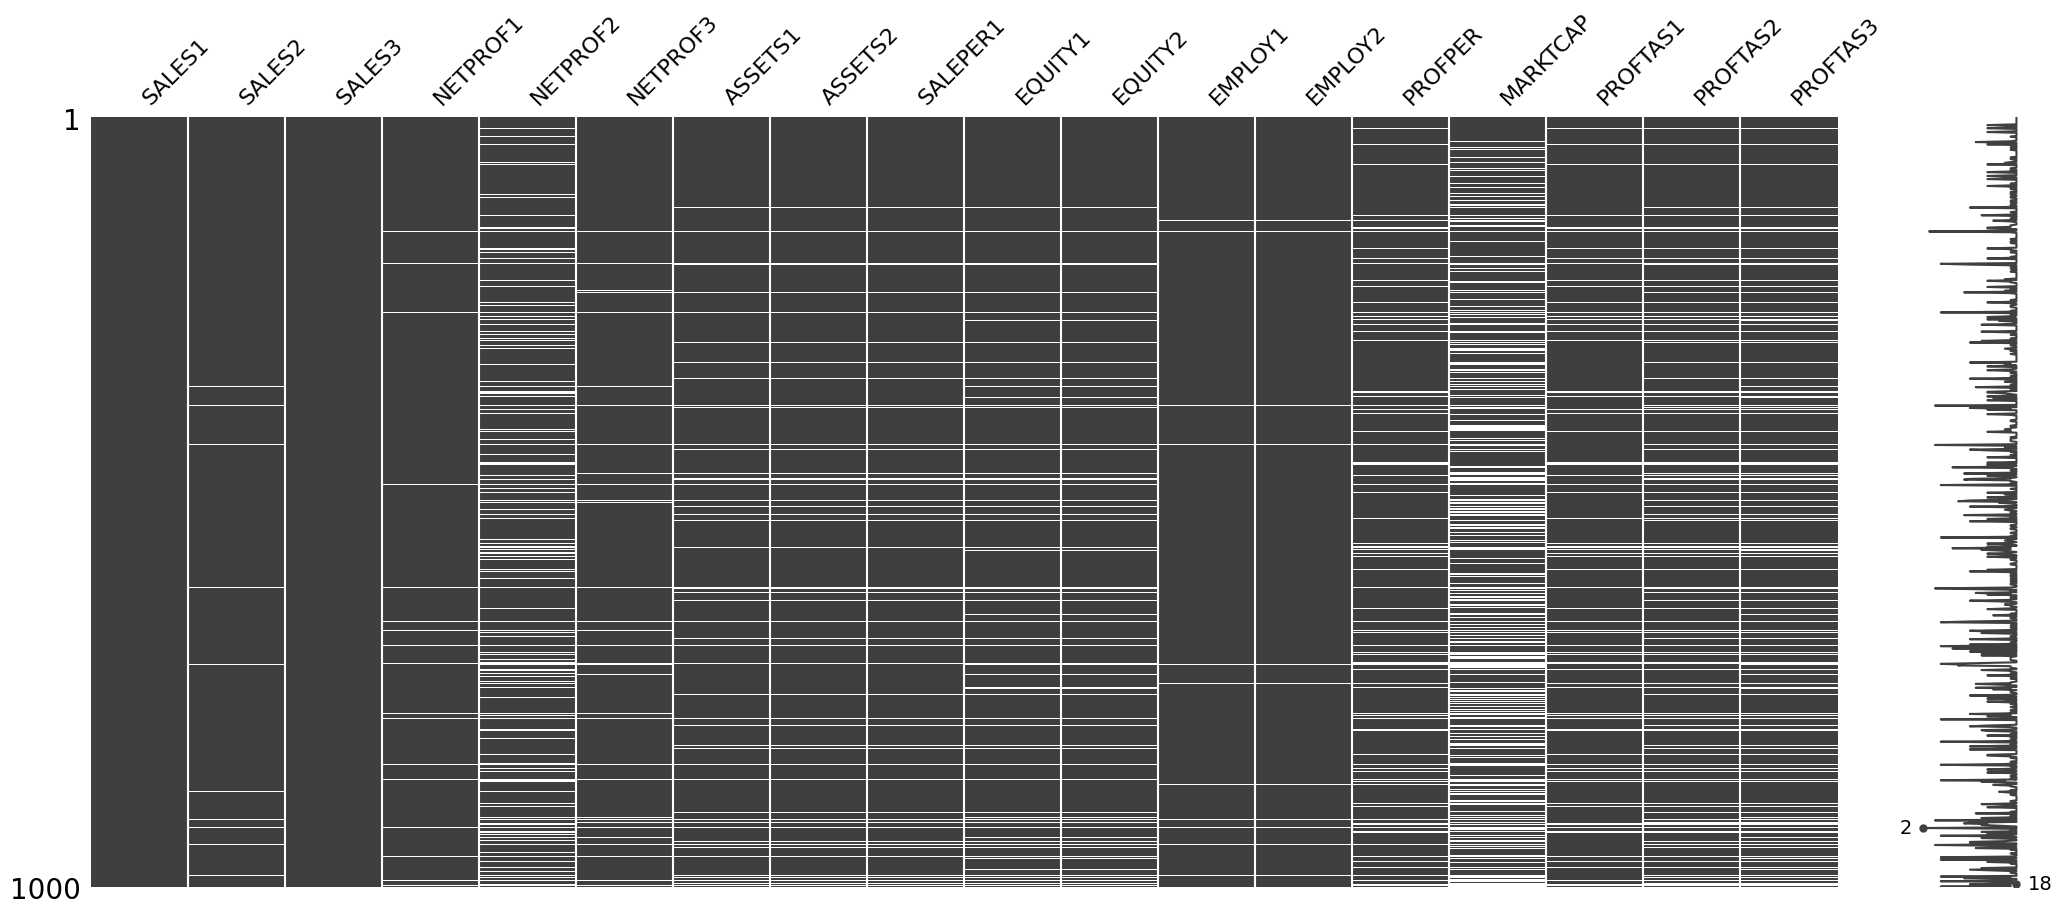

In [ ]:
import missingno as msno

# Visual check for missingness pattern
#
msno.matrix(df_input)

<Axes: >

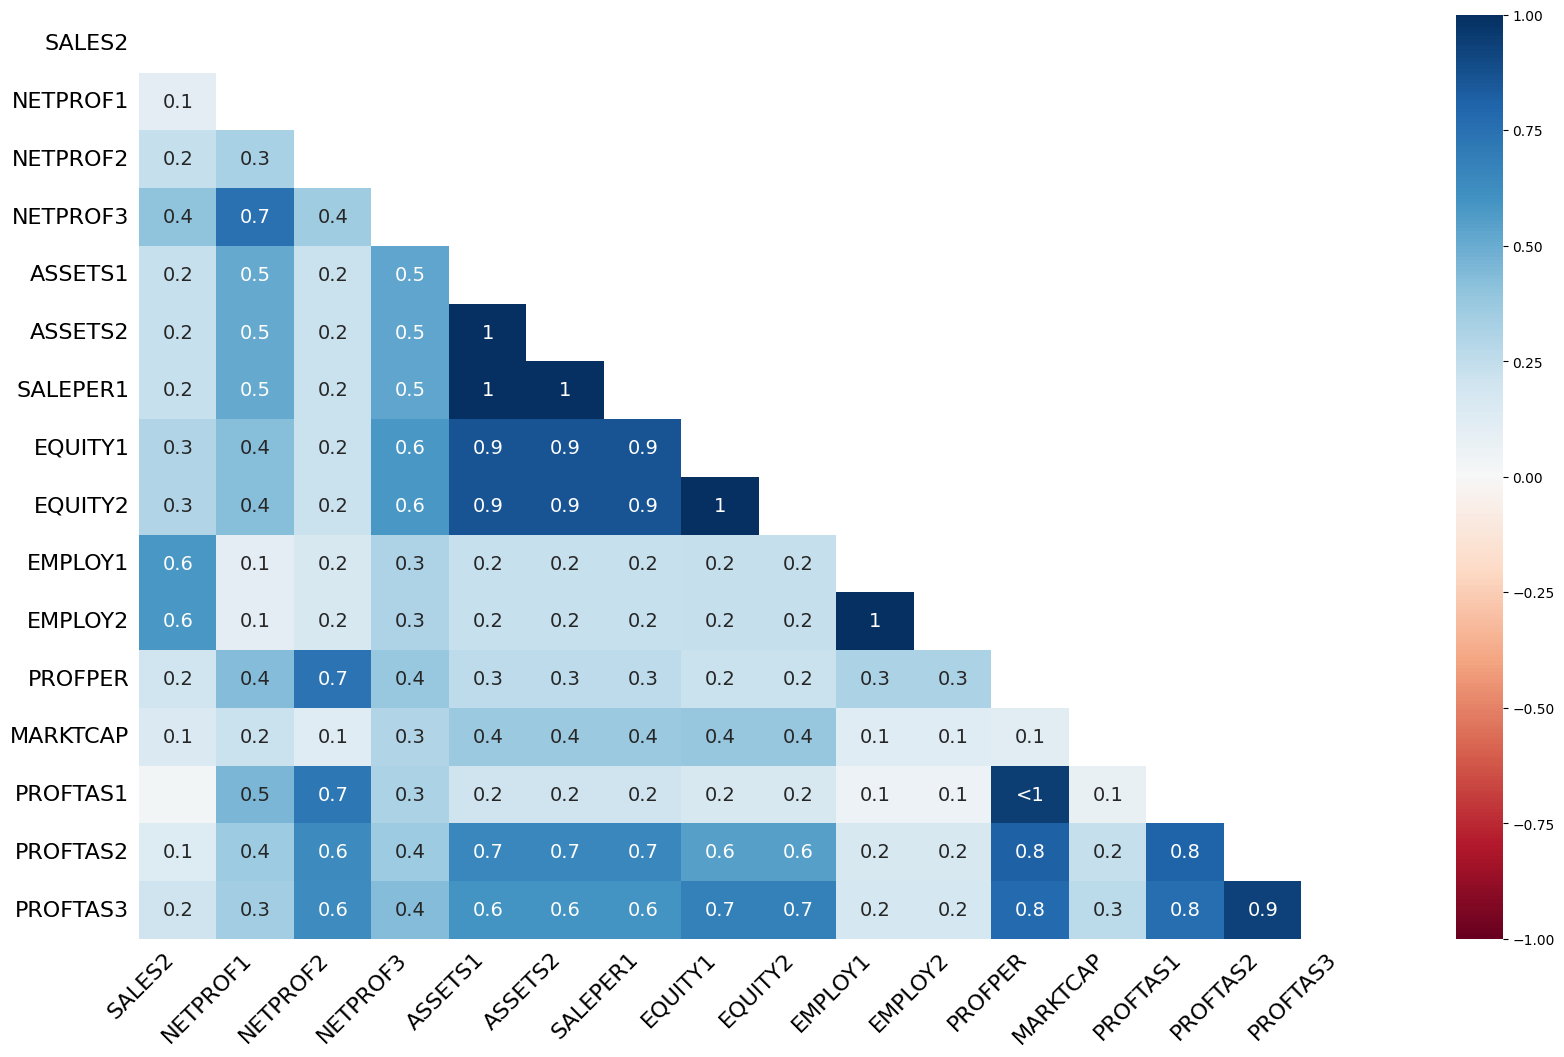

In [ ]:
# The heatmap shows the correlation of missingness between different columns;
msno.heatmap(df_input)

In [ ]:
!pip install pyampute

In [ ]:
# we show an example here. But we have seen that our data is MAR for some variables.
from pyampute.exploration.mcar_statistical_tests import MCARTest

# Implementation of Little’s MCAR test
mt = MCARTest(method='little')
print(mt.little_mcar_test(df_input))

0.0


# Data Preparation

## Iterative Imputer

In [ ]:
# check version again
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
# To use the experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

### RandomForest Regressor

In [ ]:
# Define the RandomForestRegressor as the estimator for the imputation
rf_regressor = RandomForestRegressor(random_state=101)

# Define the IterativeImputer with the RandomForestRegressor as its estimator
iterative_imputer = IterativeImputer(estimator=rf_regressor,
                                     max_iter=20,
                                     tol=0.1,
                                     random_state=101)

In [ ]:
# Define the parameter grid for RandomForestRegressor
param_grid = {
  # Number of trees in the forest
  'n_estimators': randint(50, 500),
  # Maximum depth of the tree
  'max_depth': randint(3, 10),
  # this can not be too small, determined based on sample size
  'min_samples_split': [20, 30, 40, 50, 60],
  # The number of samples to draw from X to train each base estimator
  'max_samples': [0.5,0.75,1.0]
}

In [ ]:
# Setup RandomizedSearchCV to tune the hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    # Number of parameter settings that are sampled
    n_iter=30,
    # Use MSE as the scoring metric
    scoring='neg_mean_squared_error',
    # Number of folds in cross-validation
    cv=5,
    random_state=42,
    # to run in parallel using all available cores
    n_jobs=-1
)

In [ ]:
# Drop rows with any missing values
df_input_filtered = df_input.dropna()

# Split into features and target
X = df_input_filtered.drop(columns=['MARKTCAP'])
y = df_input_filtered['MARKTCAP']

In [ ]:
# Fit the RandomizedSearchCV; this will takes a while.
%%time
random_search.fit(X, y)

# Print all results
print("All results:")

for mean_score, params in zip(random_search.cv_results_['mean_test_score'],
                              random_search.cv_results_['params']):
  # Using a generator expression to format each key-value pair in params
  params_str = "\n".join([f"{key}: {value}" for key,
                          value in params.items()])
  print(f"Score: {mean_score}, Parameters:\n{params_str}\n")
  #print(f"Score: {mean_score}, Parameters: {params}")

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Formatting best_params to print each on a new line
best_params_str = "\n".join([f"{key}: {value}" for key,
                             value in best_params.items()])

print("\nBest parameters:\n" + best_params_str)
print(f"Best score (neg_mean_squared_error): {best_score}")

#print("\nBest parameters:", best_params)
#print("Best score (neg_mean_squared_error):", best_score)

All results:
Score: -42357333.23575181, Parameters:
max_depth: 9
max_samples: 0.5
min_samples_split: 40
n_estimators: 121

Score: -42301776.7499665, Parameters:
max_depth: 7
max_samples: 0.5
min_samples_split: 30
n_estimators: 264

Score: -44123337.79435927, Parameters:
max_depth: 5
max_samples: 1.0
min_samples_split: 60
n_estimators: 149

Score: -43859725.18314748, Parameters:
max_depth: 5
max_samples: 0.75
min_samples_split: 60
n_estimators: 307

Score: -41650293.942540064, Parameters:
max_depth: 6
max_samples: 0.75
min_samples_split: 30
n_estimators: 241

Score: -41600985.25722299, Parameters:
max_depth: 6
max_samples: 0.5
min_samples_split: 20
n_estimators: 363

Score: -43518640.96749391, Parameters:
max_depth: 8
max_samples: 0.5
min_samples_split: 50
n_estimators: 394

Score: -43030072.787705824, Parameters:
max_depth: 3
max_samples: 1.0
min_samples_split: 40
n_estimators: 219

Score: -42328538.81107195, Parameters:
max_depth: 6
max_samples: 1.0
min_samples_split: 40
n_estimators:

In [ ]:
# You can direcly apply the best parameters to RandomForestRegressor, as below:
imputer = IterativeImputer(estimator=RandomForestRegressor(**best_params,
                                                           random_state=101,
                                                           n_jobs=-1),
                           max_iter=20,
                           tol=0.1,
                           random_state=101)

In [ ]:
# Or you can manually input the best parameters.
%%time
imputer=IterativeImputer(estimator=RandomForestRegressor(n_estimators=121,
                                                         max_depth=9,
                                                         min_samples_split=40,
                                                         max_samples=0.5,
                                                         n_jobs=-1,
                                                         random_state=101),
                         max_iter=20,
                         tol=0.1,
                         random_state=101)

# Impute the missing values
imputed_data = imputer.fit_transform(df_input)

# Create imputed dataframe
imputed_df = pd.DataFrame(imputed_data, columns=df_input.columns)

CPU times: user 28.1 s, sys: 481 ms, total: 28.5 s
Wall time: 18.7 s


In [ ]:
imputed_df.head(3)

,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,155976.9,-1.2,1.0,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3
1,147571.8,-4.9,2.0,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8
2,143131.9,-2.7,3.0,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9


In [ ]:
# List of columns in imputed_df to be added to df_input with a prefix
# columns_to_add = ['SALES', 'NETPROF', 'ASSETS', 'EQUITY', 'EMPLOY', 'PROFTAS']
columns_to_add = ['SALES1', 'SALES2', 'NETPROF1', 'NETPROF2', 'NETPROF3', 'ASSETS1', 'ASSETS2', 'SALEPER1', 'EQUITY1', 'EQUITY2', 'EMPLOY1', 'EMPLOY2', 'PROFPER', 'MARKTCAP', 'PROFTAS1', 'PROFTAS2', 'PROFTAS3']

# Iterate over the columns and add them to df_input with a new column name prefix

for column in columns_to_add:
  df_input[f'Tree_Imputed_{column}'] = imputed_df[column]

In [ ]:
df_input.head(3)

,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Tree_Imputed_SALES1,Tree_Imputed_SALES2,Tree_Imputed_NETPROF1,Tree_Imputed_NETPROF2,Tree_Imputed_NETPROF3,Tree_Imputed_ASSETS1,Tree_Imputed_ASSETS2,Tree_Imputed_SALEPER1,Tree_Imputed_EQUITY1,Tree_Imputed_EQUITY2,Tree_Imputed_EMPLOY1,Tree_Imputed_EMPLOY2,Tree_Imputed_PROFPER,Tree_Imputed_MARKTCAP,Tree_Imputed_PROFTAS1,Tree_Imputed_PROFTAS2,Tree_Imputed_PROFTAS3
0,155976.9,-1.2,1,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3,155976.9,-1.2,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3
1,147571.8,-4.9,2,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8,147571.8,-4.9,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8
2,143131.9,-2.7,3,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9,143131.9,-2.7,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9


### BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge, Ridge
from scipy.stats import uniform
import random

In [ ]:
param_grid = {
# Example range, adjust based on your needs
'alpha_1': uniform(1e-6, 1e-3),
'alpha_2': uniform(1e-6, 1e-3),
'lambda_1': uniform(1e-6, 1e-3),
'lambda_2': uniform(1e-6, 1e-3),
'n_iter': randint(50,300)}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=BayesianRidge(),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [ ]:
df_input_original = df[['SALES1', 'SALES2', 'SALES3', 'NETPROF1', 'NETPROF2', 'NETPROF3', 'ASSETS1', 'ASSETS2', 'SALEPER1', 'EQUITY1', 'EQUITY2', 'EMPLOY1', 'EMPLOY2', 'PROFPER', 'MARKTCAP', 'PROFTAS1', 'PROFTAS2', 'PROFTAS3']]
# makes df_input explicitly a copy, not a view, of the original df
df_input_original = df_input_original.copy()
df_input_original.head(3)

,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,155976.9,-1.2,1,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3
1,147571.8,-4.9,2,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8
2,143131.9,-2.7,3,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9


In [ ]:
# Drop rows with any missing values
df_input_filtered = df_input_original.dropna()

# Split into features and target
X = df_input_filtered.drop(columns=['MARKTCAP'])
y = df_input_filtered['MARKTCAP']

In [ ]:
param_grid = {
     # Number of trees in the forest
    'n_estimators': randint(50, 500),
     # Maximum depth of the tree
    'max_depth': randint(3, 10),
    # this can not be too small, determined based on sample size
    'min_samples_split': [20, 30, 40, 50, 60],
    # The number of samples to draw from X to train each base estimator
    'max_samples': [0.5,0.75,1.0]
}

In [ ]:
param_grid = {
# Example range, adjust based on your needs
'alpha_1': uniform(1e-6, 1e-3),
'alpha_2': uniform(1e-6, 1e-3),
'lambda_1': uniform(1e-6, 1e-3),
'lambda_2': uniform(1e-6, 1e-3),
'max_iter': randint(50,300)} # Changed n_iter to max_iter

In [ ]:
param_grid = {
# Example range, adjust based on your needs
'alpha_1': uniform(1e-6, 1e-3),
'alpha_2': uniform(1e-6, 1e-3),
'lambda_1': uniform(1e-6, 1e-3),
'lambda_2': uniform(1e-6, 1e-3),
'max_iter': randint(50,300)} # Changed n_iter to max_iter

random_search = RandomizedSearchCV(
    estimator=BayesianRidge(),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Fit the RandomizedSearchCV
%%time
random_search.fit(X, y)

# Print all results
print("All results:")

for mean_score, params in zip(random_search.cv_results_['mean_test_score'],
                              random_search.cv_results_['params']):
  # Using a generator expression to format each key-value pair in params
  params_str = "\n".join([f"{key}: {value}" for key,
                          value in params.items()])
  print(f"Score: {mean_score}, Parameters:\n{params_str}\n")
  #print(f"Score: {mean_score}, Parameters: {params}")

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Formatting best_params to print each on a new line
best_params_str = "\n".join([f"{key}: {value}" for key,
                             value in best_params.items()])

print("\nBest parameters:\n" + best_params_str)
print(f"Best score (neg_mean_squared_error): {best_score}")

#print("\nBest parameters:", best_params)
#print("Best score (neg_mean_squared_error):", best_score)

All results:
Score: -33233234.01825128, Parameters:
alpha_1: 0.0003755401188473625
alpha_2: 0.0009517143064099162
lambda_1: 0.0007329939418114052
lambda_2: 0.0005996584841970366
max_iter: 152

Score: -33233255.239554178, Parameters:
alpha_1: 0.0004468327528535912
alpha_2: 0.00010097491581800288
lambda_1: 0.0004602488919658672
lambda_2: 0.00033470861113902184
max_iter: 153

Score: -33233216.73777792, Parameters:
alpha_1: 0.0007090725777960455
alpha_2: 2.158449429580245e-05
lambda_1: 0.0009709098521619943
lambda_2: 0.0008334426408004218
max_iter: 87

Score: -33233246.99436328, Parameters:
alpha_1: 1.7787658410143283e-06
alpha_2: 0.0009932115592912174
lambda_1: 0.0006184815096277166
lambda_2: 0.000612653160488281
max_iter: 285

Score: -33233249.000626594, Parameters:
alpha_1: 2.4062425041415758e-05
alpha_2: 0.0005257746602583892
lambda_1: 0.0004008609717152555
lambda_2: 4.7665663213615426e-05
max_iter: 237

Score: -33233210.998610757, Parameters:
alpha_1: 0.00036736184329369173
alpha_2: 0

In [ ]:
%%time
imputer = IterativeImputer(estimator=BayesianRidge(max_iter=167, # Changed n_iter to max_iter
                                                   alpha_1=0.00022310781047073025,
                                                   alpha_2=0.0001208653673336828,
                                                   lambda_1=0.000338615171403628,
                                                   lambda_2=0.0009439097039125192),
                           max_iter=300,
                           tol=0.01,
                           random_state=202)

# Impute the missing values
imputed_data = imputer.fit_transform(df_input_original)

# Create imputed dataframe
imputed_df = pd.DataFrame(imputed_data, columns=df_input_original.columns)

CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 70.3 ms


In [ ]:
imputed_df.head(3)

,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,155976.9,-1.2,1.0,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3
1,147571.8,-4.9,2.0,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8
2,143131.9,-2.7,3.0,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9


In [ ]:
# List of columns in imputed_df to be added to df_input with a prefix
columns_to_add = ['SALES1', 'SALES2', 'NETPROF1', 'NETPROF2', 'NETPROF3', 'ASSETS1', 'ASSETS2', 'SALEPER1', 'EQUITY1', 'EQUITY2', 'EMPLOY1', 'EMPLOY2', 'PROFPER', 'MARKTCAP', 'PROFTAS1', 'PROFTAS2', 'PROFTAS3']

# Iterate over the columns and add them to df_input with a new column name prefix
for column in columns_to_add:
    df_input[f'Ridge_Imputed_{column}'] = imputed_df[column] #Fixed: Removed extra 'S' and corrected indentation

In [ ]:
print(df_input.head(3))

     SALES1  SALES2  SALES3  NETPROF1  NETPROF2  NETPROF3  ASSETS1  ASSETS2  \
0  155976.9    -1.2       1     92.30     368.8     232.0  42171.2     12.0   
1  147571.8    -4.9       2    213.20      42.9     109.0  53233.1      9.0   
2  143131.9    -2.7       3      1.18       1.8     182.0  36316.0     16.0   

   SALEPER1  EQUITY1  EQUITY2  EMPLOY1  EMPLOY2  PROFPER  MARKTCAP  PROFTAS1  \
0      3.70   3953.8     79.0   7345.0    280.0  12569.0    8461.5       0.1   
1      2.77   5587.0     49.0   8341.0    253.0  25564.0   12378.8       0.1   
2      3.94   6148.5     38.0   6491.0    314.0  18182.0    9695.4       0.1   

   PROFTAS2  PROFTAS3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  \
0       0.2       2.3             155976.9                 -1.2   
1       0.4       3.8             147571.8                 -4.9   
2       0.3       1.9             143131.9                 -2.7   

   Tree_Imputed_NETPROF1  Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  \
0                  

# Create two imputed dataset

In [ ]:
df_input.columns

Index(['SALES1', 'SALES2', 'SALES3', 'NETPROF1', 'NETPROF2', 'NETPROF3',
       'ASSETS1', 'ASSETS2', 'SALEPER1', 'EQUITY1', 'EQUITY2', 'EMPLOY1',
       'EMPLOY2', 'PROFPER', 'MARKTCAP', 'PROFTAS1', 'PROFTAS2', 'PROFTAS3',
       'Tree_Imputed_SALES1', 'Tree_Imputed_SALES2', 'Tree_Imputed_NETPROF1',
       'Tree_Imputed_NETPROF2', 'Tree_Imputed_NETPROF3',
       'Tree_Imputed_ASSETS1', 'Tree_Imputed_ASSETS2', 'Tree_Imputed_SALEPER1',
       'Tree_Imputed_EQUITY1', 'Tree_Imputed_EQUITY2', 'Tree_Imputed_EMPLOY1',
       'Tree_Imputed_EMPLOY2', 'Tree_Imputed_PROFPER', 'Tree_Imputed_MARKTCAP',
       'Tree_Imputed_PROFTAS1', 'Tree_Imputed_PROFTAS2',
       'Tree_Imputed_PROFTAS3', 'Ridge_Imputed_SALES1', 'Ridge_Imputed_SALES2',
       'Ridge_Imputed_NETPROF1', 'Ridge_Imputed_NETPROF2',
       'Ridge_Imputed_NETPROF3', 'Ridge_Imputed_ASSETS1',
       'Ridge_Imputed_ASSETS2', 'Ridge_Imputed_SALEPER1',
       'Ridge_Imputed_EQUITY1', 'Ridge_Imputed_EQUITY2',
       'Ridge_Imputed_EMPLOY1', '

## Tree imputed dataset

In [ ]:
# Tree imputed dataset
Tree_impute_df = df_input[['SALES3',
                           'Tree_Imputed_SALES1',
                           'Tree_Imputed_SALES2',
                           'Tree_Imputed_NETPROF1',
                           'Tree_Imputed_NETPROF2',
                           'Tree_Imputed_NETPROF3',
                           'Tree_Imputed_ASSETS1',
                           'Tree_Imputed_ASSETS2',
                           'Tree_Imputed_SALEPER1',
                           'Tree_Imputed_EQUITY1',
                           'Tree_Imputed_EQUITY2',
                           'Tree_Imputed_EMPLOY1',
                           'Tree_Imputed_EMPLOY2',
                           'Tree_Imputed_PROFPER',
                           'Tree_Imputed_MARKTCAP',
                           'Tree_Imputed_PROFTAS1',
                           'Tree_Imputed_PROFTAS2',
                           'Tree_Imputed_PROFTAS3']]

## Ridge imputed dataset

In [ ]:
# Ridge imputed dataset
Ridge_impute_df = df_input[['SALES3',
                           'Ridge_Imputed_SALES1',
                           'Ridge_Imputed_SALES2',
                           'Ridge_Imputed_NETPROF1',
                           'Ridge_Imputed_NETPROF2',
                           'Ridge_Imputed_NETPROF3',
                           'Ridge_Imputed_ASSETS1',
                           'Ridge_Imputed_ASSETS2',
                           'Ridge_Imputed_SALEPER1',
                           'Ridge_Imputed_EQUITY1',
                           'Ridge_Imputed_EQUITY2',
                           'Ridge_Imputed_EMPLOY1',
                           'Ridge_Imputed_EMPLOY2',
                           'Ridge_Imputed_PROFPER',
                           'Ridge_Imputed_MARKTCAP',
                           'Ridge_Imputed_PROFTAS1',
                           'Ridge_Imputed_PROFTAS2',
                           'Ridge_Imputed_PROFTAS3']]

# Variable Normalization

## Z score for Tree-based imputation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tree_std_features = scaler.fit_transform(Tree_impute_df)
tree_std_features[:5]

array([[-1.73031962e+00,  1.26646598e+01, -4.83632045e-01,
         1.52610298e-02,  2.04334581e+00, -8.73094090e-01,
         4.13020148e+00, -1.75026754e+00,  9.11495249e-01,
         9.07341220e-01, -1.51591309e+00, -1.06706996e-01,
        -7.55739556e-01, -8.08710638e-02,  7.95814548e-01,
        -4.41540292e-01, -4.00936324e-01, -1.00919471e-01],
       [-1.72685552e+00,  1.19608219e+01, -7.34160344e-01,
         5.02882548e-01,  2.47854667e-03, -1.31823617e+00,
         5.35336187e+00, -1.76178021e+00,  5.24112071e-01,
         1.49485039e+00, -1.63348071e+00, -8.03425908e-02,
        -8.50976575e-01, -3.17958858e-02,  1.39881542e+00,
        -4.41540292e-01, -3.73129505e-01, -8.86739884e-02],
       [-1.72339142e+00,  1.15890275e+01, -5.85197572e-01,
        -3.52249911e-01, -2.54899927e-01, -1.05404615e+00,
         3.48276761e+00, -1.73491731e+00,  1.01146510e+00,
         1.69683814e+00, -1.67658884e+00, -1.29312621e-01,
        -6.35811457e-01, -5.96737592e-02,  9.85752202e

## Range for ridge-based imputation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

range_scaler = MinMaxScaler()
ridge_range_features = range_scaler.fit_transform(Ridge_impute_df)
ridge_range_features[:5]

array([[0.        , 1.        , 0.3947619 , 0.42851206, 0.22112929,
        0.55039364, 0.32215002, 0.01178992, 0.0966096 , 0.09480278,
        0.08505998, 0.01048155, 0.28267477, 0.00177153, 0.06603015,
        0.39406188, 0.21976595, 0.01278363],
       [0.001001  , 0.9457241 , 0.37714286, 0.4536331 , 0.06701031,
        0.47453413, 0.40665705, 0.00857449, 0.07472492, 0.13393831,
        0.0523446 , 0.01190442, 0.25531915, 0.0036031 , 0.09595036,
        0.39406188, 0.22094902, 0.01321391],
       [0.002002  , 0.91705347, 0.38761905, 0.40957882, 0.04757401,
        0.51955644, 0.27741941, 0.01607717, 0.10225726, 0.14739324,
        0.04034896, 0.00926153, 0.31712259, 0.00256265, 0.07545464,
        0.39406188, 0.22035748, 0.01266889],
       [0.003003  , 0.90074313, 0.37571429, 0.42504208, 0.04781046,
        0.57999735, 0.29390003, 0.01500536, 0.095433  , 0.10900774,
        0.07306434, 0.01008012, 0.29483283, 0.00150782, 0.05705401,
        0.39406188, 0.21976595, 0.01261152],
    

# Clustering Libraries

In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 73.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=71b763f5c64e8f2a0dd126c13d7b710e2220869de5d9365dbd87841362319273
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


In [ ]:
# from scipy.stats import gaussian_kde

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier # for variable importance

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

# evaluation
from sklearn.metrics.pairwise import pairwise_distances_argmin

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer
import warnings
warnings.filterwarnings("ignore")

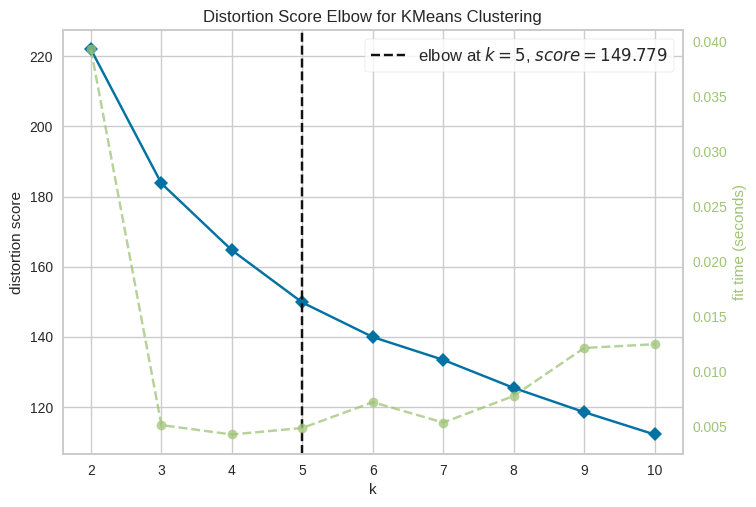

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Ridge based imputation

model = KMeans(random_state=80)
visualizer = KElbowVisualizer(model, k=(2, 11))

visualizer.fit(ridge_range_features)
visualizer.show()

## SKlearn Kmeans clustering

### Determine number of clusters

#### Tree-based imputation

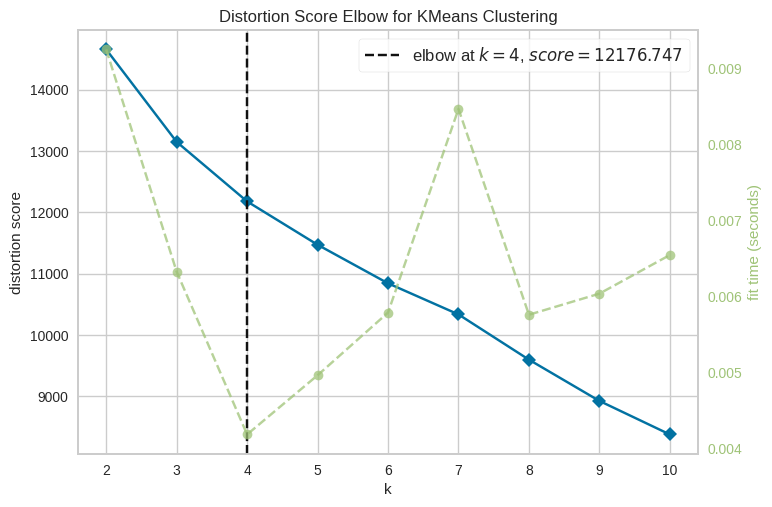

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(KMeans(random_state=80), k=(2, 11))
visualizer.fit(tree_std_features) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

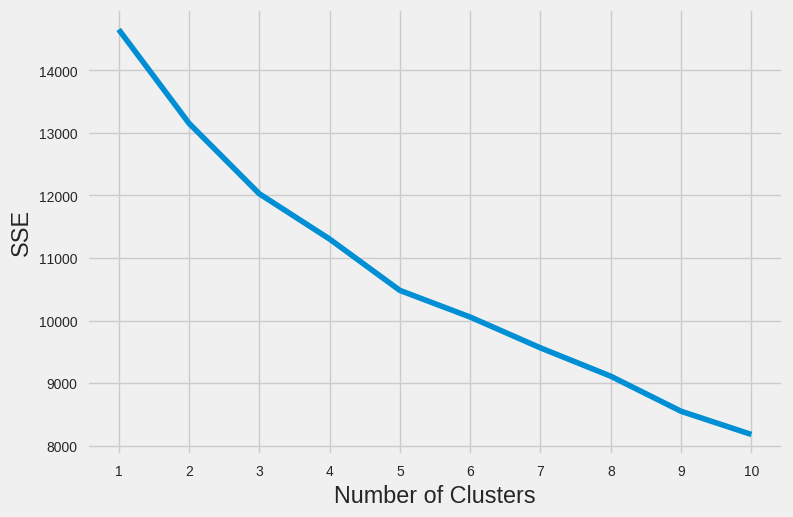

In [ ]:
# below is another way using sklearn Kmeans build in functions
kmeans_kwargs = {"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 80}
sse = []
for k in range(2, 12):
  kmeans_x = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans_x.fit(tree_std_features)
  sse.append(kmeans_x.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### Ridge based Imputation

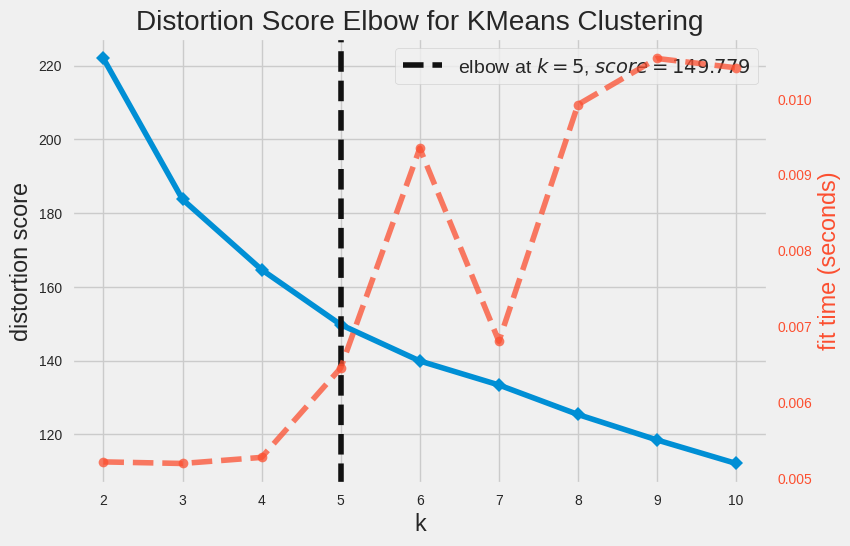

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=80)
visualizer = KElbowVisualizer(model, k=(2, 11))

visualizer.fit(ridge_range_features)
visualizer.show()

# Elbow Plot

In [ ]:
# import elbow method
from pyclustering.cluster.elbow import elbow

In [ ]:
# The optimal number of clusters using Kmeans++ initializer
kmin, kmax = 2, 11
elbow_instance = elbow(tree_std_features,
                       kmin,
                       kmax,
                       random_state=108,
                       initializer=kmeans_plusplus_initializer)

elbow_instance.process()
amount_clusters = elbow_instance.get_amount()

print(amount_clusters)

4


In [ ]:
# the optimal number of clusters using random center initializer
kmin, kmax = 2, 11
elbow_instance = elbow(tree_std_features,
                       kmin,
                       kmax,
                       random_state=108,
                       initializer=random_center_initializer)

elbow_instance.process()
amount_clusters = elbow_instance.get_amount()

print(amount_clusters)

4


In [ ]:
# ridge imputed
kmin, kmax = 2, 11
elbow_instance = elbow(ridge_range_features,
                       kmin,
                       kmax,
                       random_state=108,
                       initializer=kmeans_plusplus_initializer)

elbow_instance.process()
amount_clusters = elbow_instance.get_amount()

print(amount_clusters)

6


# Question 1

## LKER_E

*   Algorithm: lloyd
*   Initial Cluster Centers: K-means ++
*   Distance Measure: Euclidean
*   Normalization Method: Range
*   Number of Clusters: Elbow plot

In [ ]:
k_means_LKER = KMeans(
    init='k-means++',
    n_clusters=4,  # Replace with the number of clusters identified using the elbow plot
    n_init=10,
    max_iter=300,
    random_state=101,
    algorithm='lloyd'
)
k_means_LKER.fit(ridge_range_features)

KMeans(n_clusters=4, n_init=10, random_state=101)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

# coordinates of cluster center
k_means_LKER_centroids = k_means_LKER.cluster_centers_

# assign a cluster label to each data point
k_means_LKER_labels = pairwise_distances_argmin(ridge_range_features,
                                             k_means_LKER_centroids)

# print(k_means_cluster_centers)
print(k_means_LKER_labels[:10])

[2 2 2 2 2 2 2 2 2 2]


In [ ]:
# we can see an outlier cluster below
unique, counts = np.unique(k_means_LKER_labels, return_counts=True)
print(unique, counts)

[0 1 2 3] [229 220 257 294]


## LREZ_E

*   Algorithm: lloyd
*   Initial Cluster Centers: Random
*   Distance Measure: Euclidean
*   Normalization Method: Z-Score
*   Number of Clusters: Elbow plot

In [ ]:
k_means_LREZ = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=101,
    algorithm='lloyd'
)
k_means_LREZ.fit(tree_std_features)  # Replace with your Z-score normalized data


KMeans(init='random', n_clusters=4, n_init=10, random_state=101)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

# coordinates of cluster center
k_means_LREZ_centroids = k_means_LREZ.cluster_centers_

# assign a cluster label to each data point
k_means_LREZ_labels = pairwise_distances_argmin(tree_std_features,
                                             k_means_LREZ_centroids)

# print(k_means_cluster_centers)
print(k_means_LREZ_labels[:10])

[1 1 1 1 1 1 1 3 1 3]


In [ ]:
# we can see an outlier cluster below
unique, counts = np.unique(k_means_LREZ_labels, return_counts=True)
print(unique, counts)

[0 1 2 3] [ 46  30 537 387]


## EKEZ_2

*   Algorithm: elkan
*   Initial Cluster Centers: K-means ++
*   Distance Measure: Euclidean
*   Normalization Method: Z-Score
*   Number of Clusters: 2

In [ ]:
k_means_EKEZ = KMeans(
    init='k-means++',
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=101,
    algorithm='elkan'
)
k_means_EKEZ.fit(tree_std_features)  # Replace with your Z-score normalized data

KMeans(algorithm='elkan', n_clusters=2, n_init=10, random_state=101)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

# coordinates of cluster center
k_means_EKEZ_centroids = k_means_EKEZ.cluster_centers_

# assign a cluster label to each data point
k_means_EKEZ_labels = pairwise_distances_argmin(tree_std_features,
                                             k_means_EKEZ_centroids)

# print(k_means_cluster_centers)
print(k_means_EKEZ_labels[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# we can see an outlier cluster below
unique, counts = np.unique(k_means_EKEZ_labels, return_counts=True)
print(unique, counts)

[0 1] [296 704]


## ERER_4

*   Algorithm: elkan
*   Initial Cluster Centers: Random
*   Distance Measure: Euclidean
*   Normalization Method: Range
*   Number of Clusters: 4

In [ ]:
k_means_ERER = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=101,
    algorithm='elkan'
)
k_means_ERER.fit(ridge_range_features)  # Replace with your range-normalized data

KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=10,
       random_state=101)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

# coordinates of cluster center
k_means_ERER_centroids = k_means_ERER.cluster_centers_

# assign a cluster label to each data point
k_means_ERER_labels = pairwise_distances_argmin(ridge_range_features,
                                             k_means_ERER_centroids)

# print(k_means_cluster_centers)
print(k_means_ERER_labels[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# we can see an outlier cluster below
unique, counts = np.unique(k_means_ERER_labels, return_counts=True)
print(unique, counts)

[0 1 2 3] [265 217 298 220]


## MRMR_4

*   Algorithm: MacQueen
*   Initial Cluster Centers: Random
*   Distance Measure: Manhattan
*   Normalization Method: Range
*   Number of Clusters: 4

In [ ]:
!pip install pyclustering

In [ ]:
from pyclustering.cluster.kmeans import kmeans, kmeans_observer
initial_centers = kmeans_plusplus_initializer(ridge_range_features, 4).initialize()

# Create instance of K-Means algorithm with MacQueen initialization
kmeans_instance = kmeans(ridge_range_features, initial_centers, observer=kmeans_observer(), tolerance=0.001, metric=distance_metric(2))

# Run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

In [ ]:
final_centers = kmeans_instance.get_centers()

In [ ]:
# enumerate encoding type to index labeling to get labels
MRMR_4_Encoding = kmeans_instance.get_cluster_encoding()
MRMR_4_Encoder = cluster_encoder(MRMR_4_Encoding,
clusters,
tree_std_features)
#get cluster labels
MRMR_4_Labels = MRMR_4_Encoder.set_encoding(0).get_clusters()
MRMR_4_Labels[:5]

[2, 2, 2, 2, 2]

In [ ]:
# we see an outlier cluster below.
unique, counts = np.unique(MRMR_4_Labels,
                           return_counts=True)
print(unique, counts)

[0 1 2 3] [349 244 108 299]


## MKCR_E

*   Algorithm: MacQueen
*   Initial Cluster Centers: K-Means ++
*   Distance Measure: chi-square
*   Normalization Method: Range
*   Number of Clusters: Elbow Plot

In [ ]:
# initialize initial centers using random method
initial_centers = kmeans_plusplus_initializer(ridge_range_features,
                                              4,
                                              random_state=101).initialize()

In [ ]:
# Use Chi-sqaure distance measure, which is 6
MKCR_E = kmeans(ridge_range_features,
                          initial_centers=initial_centers,
                          random_state=101,
                          metric=distance_metric(6))

In [ ]:
# run cluster analysis and obtain results
MKCR_E.process()
Chi_4_clusters = MKCR_E.get_clusters()
final_centers = MKCR_E.get_centers()

In [ ]:
# enumerate encoding type to index labeling to get labels
MKCR_E_Encoding = MKCR_E.get_cluster_encoding()
MKCR_E_Encoder = cluster_encoder(MKCR_E_Encoding,
                                Chi_4_clusters,
                                ridge_range_features)

# get cluster labels
MKCR_E_Labels = MKCR_E_Encoder.set_encoding(0).get_clusters()
MKCR_E_Labels[:5]

[1, 1, 1, 1, 1]

In [ ]:
unique, counts = np.unique(MKCR_E_Labels,
                           return_counts=True)

print(unique, counts)

[0 1 2 3] [480 151 367   2]


# Evaluation

## EKEZ_2

In [ ]:
EKEZ_2_label_df = Tree_impute_df.copy()
EKEZ_2_label_df['label'] = k_means_EKEZ

print(EKEZ_2_label_df.head())

   SALES3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  Tree_Imputed_NETPROF1  \
0       1             155976.9                 -1.2                  92.30   
1       2             147571.8                 -4.9                 213.20   
2       3             143131.9                 -2.7                   1.18   
3       4             140606.1                 -5.2                  75.60   
4       5             135136.9                 -2.2                 156.30   

   Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  Tree_Imputed_ASSETS1  \
0                  368.8                  232.0               42171.2   
1                   42.9                  109.0               53233.1   
2                    1.8                  182.0               36316.0   
3                    2.3                  280.0               38473.3   
4                  400.9                  144.0               61025.3   

   Tree_Imputed_ASSETS2  Tree_Imputed_SALEPER1  Tree_Imputed_EQUITY1  \
0                  1

In [ ]:
EKEZ_2_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SALES3                 1000 non-null   int64  
 1   Tree_Imputed_SALES1    1000 non-null   float64
 2   Tree_Imputed_SALES2    1000 non-null   float64
 3   Tree_Imputed_NETPROF1  1000 non-null   float64
 4   Tree_Imputed_NETPROF2  1000 non-null   float64
 5   Tree_Imputed_NETPROF3  1000 non-null   float64
 6   Tree_Imputed_ASSETS1   1000 non-null   float64
 7   Tree_Imputed_ASSETS2   1000 non-null   float64
 8   Tree_Imputed_SALEPER1  1000 non-null   float64
 9   Tree_Imputed_EQUITY1   1000 non-null   float64
 10  Tree_Imputed_EQUITY2   1000 non-null   float64
 11  Tree_Imputed_EMPLOY1   1000 non-null   float64
 12  Tree_Imputed_EMPLOY2   1000 non-null   float64
 13  Tree_Imputed_PROFPER   1000 non-null   float64
 14  Tree_Imputed_MARKTCAP  1000 non-null   float64
 15  Tree_

In [ ]:
EKEZ_2_label_df['label'].value_counts()

,count
label,
"KMeans(algorithm='elkan', n_clusters=2, n_init=10, random_state=101)",1000


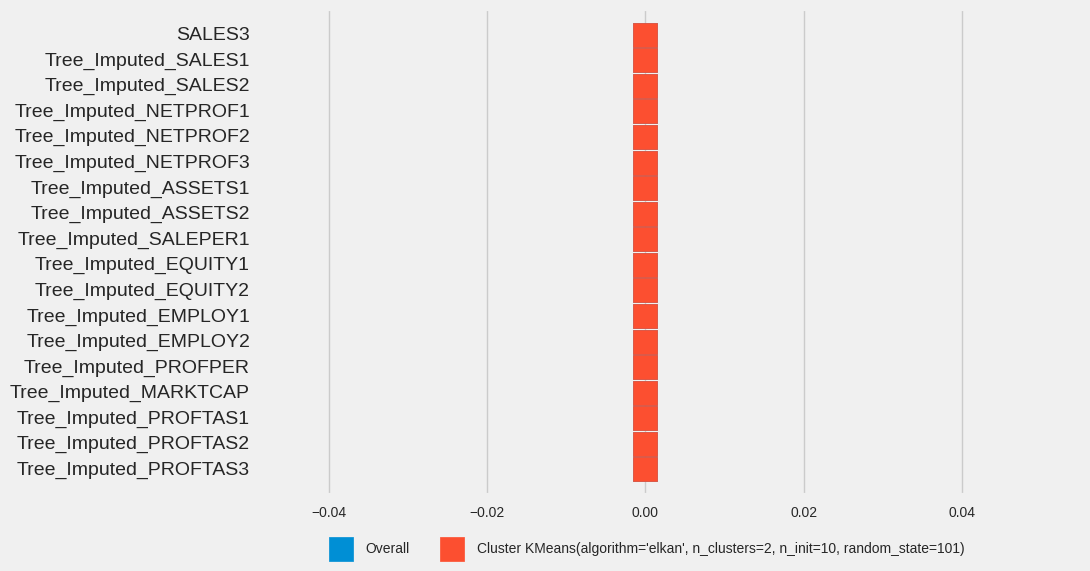

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exclude cluster label column
labels_to_exclude = ['label']
column_list = [col for col in EKEZ_2_label_df.columns if col not in labels_to_exclude]

plot_data = []

# Compute normalized means for each feature by cluster
for feature in column_list:
    feature_grouped = EKEZ_2_label_df.groupby('label')[feature]
    feature_means = feature_grouped.mean()
    overall_mean = EKEZ_2_label_df[feature].mean()

    # Handle case where min and max are the same (to avoid division by zero)
    min_val, max_val = feature_means.min(), feature_means.max()
    if min_val == max_val:
        normalized_means = feature_means.apply(lambda x: 0)  # Set all values to 0 to avoid NaN
        normalized_overall = 0
    else:
        normalized_means = (feature_means - min_val) / (max_val - min_val)
        normalized_overall = (overall_mean - min_val) / (max_val - min_val)

    # Store normalized values in a dictionary
    plot_dict = {'feature': feature, 'Overall': round(normalized_overall, 3)}
    plot_dict.update({f'Cluster {label}': round(norm_val, 3) for label, norm_val in normalized_means.items()})

    plot_data.append(plot_dict)

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data).set_index('feature')

# Remove rows with NaN values before plotting
plot_df = plot_df.dropna()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_label in plot_df.columns:
    ax.scatter(plot_df[cluster_label], plot_df.index.astype(str), marker='s', s=300, label=cluster_label)

# Add feature names as text
for i, feature in enumerate(plot_df.index):
    ax.text(-0.05, i, feature, ha='right', va='center', fontsize=14)

# Adjustments for better visualization
ax.set_ylim(-1, len(plot_df))
ax.invert_yaxis()  # Puts the first feature at the top
ax.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# you can save the file to csv and manually calculate the noramlized means.
# EKEZ_2_label_df.to_csv(file_path + 'EKEZ_2_label_df.csv')

In [ ]:
# EKEZ_2_plot_table=pd.DataFrame(EKEZ_2_plot_list)
# EKEZ_2_plot_table

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# # write the vertical lines
# ax.vlines(x=0, ymin=0, ymax=5, color='black',
#           alpha=0.7, linewidth=1, linestyles='dotted')
# ax.vlines(x=1, ymin=0, ymax=5, color='black',
#           alpha=0.7, linewidth=1, linestyles='dotted')

# y_reversed_index = list(range(len(EKEZ_2_plot_table)))
# y_reversed_index.reverse()

# ax.scatter(x = EKEZ_2_plot_table['0_norm'],
#            y = y_reversed_index, marker = 's', s=300,
#            c='red', label = '0')

# ax.scatter(x = EKEZ_2_plot_table['1_norm'],
#            y = y_reversed_index, marker = 's', s=300,
#            c='green', label = '1')

# ax.scatter(x = EKEZ_2_plot_table['2_norm'],
#            y = y_reversed_index, marker = 's', s=300,
#            c='blue', label = '2')

# ax.scatter(x = EKEZ_2_plot_table['overall_norm'],
#            y = y_reversed_index, marker = 's', s=300,
#            c='grey', label = 'overall')

# for i in y_reversed_index:
#   ax.text(0-0.05, i, EKEZ_2_plot_table.iloc[i][0],
#           horizontalalignment='right',
#           verticalalignment='center',
#           fontdict={'size':14})

# ax.legend(loc='lower center',
#             ncol=10,
#             bbox_to_anchor=(0.5, -0.15))

# ax.get_yaxis().set_visible(False)

In [ ]:
# # use the following code to plot normalized mean plot
# EKEZ_2_column_list = list(EKEZ_2_label_df.columns)
# EKEZ_2_plot_list = []

# # remove clustering label when retreiving the feature list
# for feature in EKEZ_2_column_list[:-1]:
#   plot_dic = {}
#   plot_dic['feature'] = feature
#   label_table = pd.DataFrame({
#       'mean' : EKEZ_2_label_df.groupby(['label'])[feature].mean()
#                               }).reset_index()

#   label_table.loc[len(label_table.index)] = ['overall',
#                                              EKEZ_2_label_df[feature].mean()]
#   label_table['normalize'] = (
#       (label_table['mean'] - label_table['mean'].min())
#       / (label_table['mean'].max() - label_table['mean'].min())
# )

# plot_dic['0_norm'] = round(label_table.iloc[0][1], 2)
# plot_dic['1_norm'] = round(label_table.iloc[1][2], 2)
# # plot_dic['2_norm'] = None
# # plot_dic['2_norm'] = round(label_table.iloc[2][2], 3)
# plot_dic['overall_norm'] = round(label_table.iloc[-2][2], 2)

# EKEZ_2_plot_list.append(plot_dic)

# Feature Importance

## LKER_E

In [ ]:
# Train a RF classifier with the default Gini
# Note overfitting is OK here because we are not worried about generalizability
RF_LKER_Kmeans = RandomForestClassifier(random_state=101)
RF_LKER_Kmeans.fit(Tree_impute_df, k_means_LKER_labels)

RandomForestClassifier(random_state=101)

In [ ]:
RF_LKER_Kmeans_Features = RF_LKER_Kmeans.feature_importances_

RF_LKER_Kmeans_Features_List = []

for i,v in enumerate(RF_LKER_Kmeans_Features):
  LKER_feature_dict = {}
  LKER_feature_dict['Features'] = Ridge_impute_df.columns[i]
  LKER_feature_dict['Importance'] = round(v,3)

  RF_LKER_Kmeans_Features_List.append(LKER_feature_dict)

LKER_DT_table = pd.DataFrame(RF_LKER_Kmeans_Features_List)
LKER_DT_table.sort_values(by='Importance', ascending=False)

,Features,Importance
12,Ridge_Imputed_EMPLOY2,0.125
10,Ridge_Imputed_EQUITY2,0.117
7,Ridge_Imputed_ASSETS2,0.100
1,Ridge_Imputed_SALES1,0.100
0,SALES3,0.098
11,Ridge_Imputed_EMPLOY1,0.098
9,Ridge_Imputed_EQUITY1,0.085
6,Ridge_Imputed_ASSETS1,0.077
14,Ridge_Imputed_MARKTCAP,0.052
5,Ridge_Imputed_NETPROF3,0.031


## EKEZ_2
Assuming EKER_2 is typo.

In [ ]:
# Train a RF classifier with the default Gini
# Note overfitting is OK here because we are not worried about generalizability
RF_EKEZ_Kmeans = RandomForestClassifier(random_state=101)
RF_EKEZ_Kmeans.fit(Tree_impute_df, k_means_EKEZ_labels)

RandomForestClassifier(random_state=101)

In [ ]:
RF_EKEZ_Kmeans_Features = RF_EKEZ_Kmeans.feature_importances_

RF_EKEZ_Kmeans_Features_List = []

for i,v in enumerate(RF_EKEZ_Kmeans_Features):
  EKEZ_feature_dict = {}
  EKEZ_feature_dict['Features'] = Tree_impute_df.columns[i]
  EKEZ_feature_dict['Importance'] = round(v,3)

  RF_EKEZ_Kmeans_Features_List.append(EKEZ_feature_dict)

EKEZ_DT_table = pd.DataFrame(RF_EKEZ_Kmeans_Features_List)
EKEZ_DT_table.sort_values(by='Importance', ascending=False)

,Features,Importance
14,Tree_Imputed_MARKTCAP,0.215
10,Tree_Imputed_EQUITY2,0.149
9,Tree_Imputed_EQUITY1,0.143
7,Tree_Imputed_ASSETS2,0.102
5,Tree_Imputed_NETPROF3,0.078
6,Tree_Imputed_ASSETS1,0.057
12,Tree_Imputed_EMPLOY2,0.052
3,Tree_Imputed_NETPROF1,0.047
11,Tree_Imputed_EMPLOY1,0.042
0,SALES3,0.029


## MRMR_4
Assuming MRMZ_4 is typo

In [ ]:
# Train a RF classifier with the default Gini
# Note overfitting is OK here because we are not worried about generalizability
RF_MRMR_Kmeans = RandomForestClassifier(random_state=101)
RF_MRMR_Kmeans.fit(Tree_impute_df, MRMR_4_Labels)

RandomForestClassifier(random_state=101)

In [ ]:
RF_MRMR_Kmeans_Features = RF_MRMR_Kmeans.feature_importances_

RF_MRMR_Kmeans_Features_List = []

for i,v in enumerate(RF_MRMR_Kmeans_Features):
  MRMR_feature_dict = {}
  MRMR_feature_dict['Features'] = Ridge_impute_df.columns[i]
  MRMR_feature_dict['Importance'] = round(v,3)

  RF_MRMR_Kmeans_Features_List.append(MRMR_feature_dict)

MRMR_DT_table = pd.DataFrame(RF_MRMR_Kmeans_Features_List)
MRMR_DT_table.sort_values(by='Importance', ascending=False)

,Features,Importance
10,Ridge_Imputed_EQUITY2,0.168
7,Ridge_Imputed_ASSETS2,0.146
6,Ridge_Imputed_ASSETS1,0.117
9,Ridge_Imputed_EQUITY1,0.111
14,Ridge_Imputed_MARKTCAP,0.091
11,Ridge_Imputed_EMPLOY1,0.068
12,Ridge_Imputed_EMPLOY2,0.064
1,Ridge_Imputed_SALES1,0.056
0,SALES3,0.051
5,Ridge_Imputed_NETPROF3,0.028


# Outlier

## LKER_E

In [ ]:
LKER_E_label_df = Tree_impute_df.copy()
LKER_E_label_df['label'] = k_means_LKER_labels
print(LKER_E_label_df.head())

# Tree imputation 6 clusters LLoyod outliers
# fun.pie_cate(LKER_E_label_df, 'label')

   SALES3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  Tree_Imputed_NETPROF1  \
0       1             155976.9                 -1.2                  92.30   
1       2             147571.8                 -4.9                 213.20   
2       3             143131.9                 -2.7                   1.18   
3       4             140606.1                 -5.2                  75.60   
4       5             135136.9                 -2.2                 156.30   

   Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  Tree_Imputed_ASSETS1  \
0                  368.8                  232.0               42171.2   
1                   42.9                  109.0               53233.1   
2                    1.8                  182.0               36316.0   
3                    2.3                  280.0               38473.3   
4                  400.9                  144.0               61025.3   

   Tree_Imputed_ASSETS2  Tree_Imputed_SALEPER1  Tree_Imputed_EQUITY1  \
0                  1

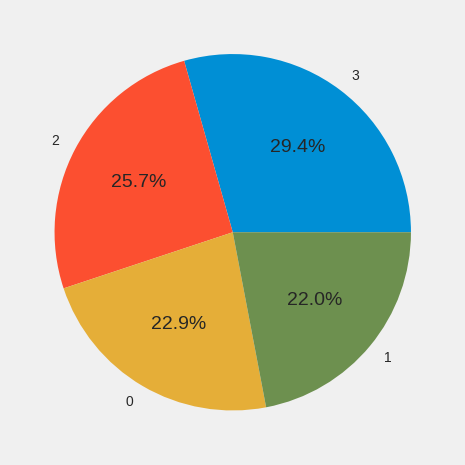

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'LKERE_label_df' DataFrame has a column 'label' with the cluster labels
label_counts = LKER_E_label_df['label'].value_counts()

# Plotting the pie chart with percentages
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.show()

## LREZ_E

In [ ]:
LREZ_label_df = Tree_impute_df.copy()
LREZ_label_df['label'] = k_means_LREZ_labels
print(LREZ_label_df.head())

# Tree imputation 6 clusters LLoyod outliers
# function.pie_cate(LREZ_label_df, 'label')

   SALES3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  Tree_Imputed_NETPROF1  \
0       1             155976.9                 -1.2                  92.30   
1       2             147571.8                 -4.9                 213.20   
2       3             143131.9                 -2.7                   1.18   
3       4             140606.1                 -5.2                  75.60   
4       5             135136.9                 -2.2                 156.30   

   Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  Tree_Imputed_ASSETS1  \
0                  368.8                  232.0               42171.2   
1                   42.9                  109.0               53233.1   
2                    1.8                  182.0               36316.0   
3                    2.3                  280.0               38473.3   
4                  400.9                  144.0               61025.3   

   Tree_Imputed_ASSETS2  Tree_Imputed_SALEPER1  Tree_Imputed_EQUITY1  \
0                  1

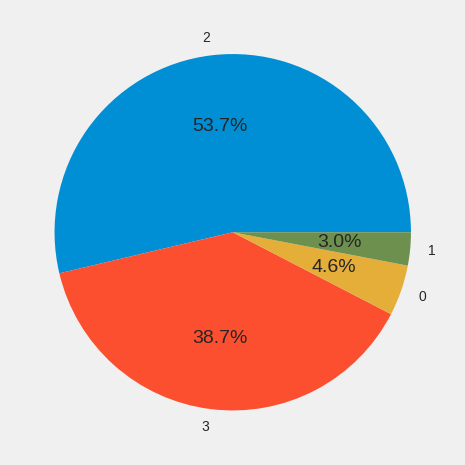

In [ ]:
import matplotlib.pyplot as plt

label_counts = LREZ_label_df['label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.show()

##EKEZ_2

In [ ]:
EKEZ_2_label_df = Tree_impute_df.copy()
EKEZ_2_label_df['label'] = k_means_EKEZ_labels
print(EKEZ_2_label_df.head())

# Tree imputation 6 clusters LLoyod outliers
# fun.pie_cate(EKEZ_2_label_df, 'label')

   SALES3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  Tree_Imputed_NETPROF1  \
0       1             155976.9                 -1.2                  92.30   
1       2             147571.8                 -4.9                 213.20   
2       3             143131.9                 -2.7                   1.18   
3       4             140606.1                 -5.2                  75.60   
4       5             135136.9                 -2.2                 156.30   

   Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  Tree_Imputed_ASSETS1  \
0                  368.8                  232.0               42171.2   
1                   42.9                  109.0               53233.1   
2                    1.8                  182.0               36316.0   
3                    2.3                  280.0               38473.3   
4                  400.9                  144.0               61025.3   

   Tree_Imputed_ASSETS2  Tree_Imputed_SALEPER1  Tree_Imputed_EQUITY1  \
0                  1

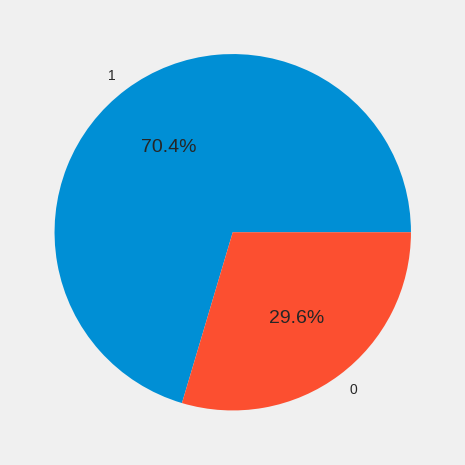

In [ ]:
import matplotlib.pyplot as plt

label_counts = EKEZ_2_label_df['label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.show()

## ERER_4

In [ ]:
ERER_4_label_df = Tree_impute_df.copy()
ERER_4_label_df['label'] = k_means_ERER_labels
print(ERER_4_label_df.head())

# Tree imputation 6 clusters LLoyod outliers
# fun.pie_cate(ERER_4_label_df, 'label')

   SALES3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  Tree_Imputed_NETPROF1  \
0       1             155976.9                 -1.2                  92.30   
1       2             147571.8                 -4.9                 213.20   
2       3             143131.9                 -2.7                   1.18   
3       4             140606.1                 -5.2                  75.60   
4       5             135136.9                 -2.2                 156.30   

   Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  Tree_Imputed_ASSETS1  \
0                  368.8                  232.0               42171.2   
1                   42.9                  109.0               53233.1   
2                    1.8                  182.0               36316.0   
3                    2.3                  280.0               38473.3   
4                  400.9                  144.0               61025.3   

   Tree_Imputed_ASSETS2  Tree_Imputed_SALEPER1  Tree_Imputed_EQUITY1  \
0                  1

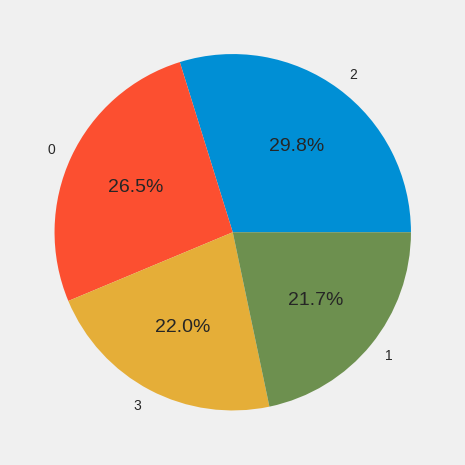

In [ ]:
import matplotlib.pyplot as plt

label_counts = ERER_4_label_df['label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.show()

## MRMR_4

In [ ]:
MRMR_4_label_df = Tree_impute_df.copy()
MRMR_4_label_df['label'] = MRMR_4_Labels
print(MRMR_4_label_df.head())

# Tree imputation 6 clusters LLoyod outliers
# fun.pie_cate(MRMR_4_label_df, 'label')

   SALES3  Tree_Imputed_SALES1  Tree_Imputed_SALES2  Tree_Imputed_NETPROF1  \
0       1             155976.9                 -1.2                  92.30   
1       2             147571.8                 -4.9                 213.20   
2       3             143131.9                 -2.7                   1.18   
3       4             140606.1                 -5.2                  75.60   
4       5             135136.9                 -2.2                 156.30   

   Tree_Imputed_NETPROF2  Tree_Imputed_NETPROF3  Tree_Imputed_ASSETS1  \
0                  368.8                  232.0               42171.2   
1                   42.9                  109.0               53233.1   
2                    1.8                  182.0               36316.0   
3                    2.3                  280.0               38473.3   
4                  400.9                  144.0               61025.3   

   Tree_Imputed_ASSETS2  Tree_Imputed_SALEPER1  Tree_Imputed_EQUITY1  \
0                  1

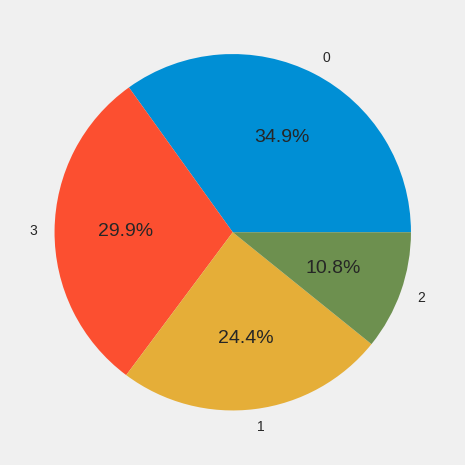

In [ ]:
import matplotlib.pyplot as plt

label_counts = MRMR_4_label_df['label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.show()

## MKCR_E

In [ ]:
MKCR_E_df = Ridge_impute_df.copy()
# create a dataframe that adds labels to the original data
MKCR_E_df['label'] = MKCR_E_Labels
print(MKCR_E_df.head(5))

# function.pie_cate(MKCR_E_df, 'label')

   SALES3  Ridge_Imputed_SALES1  Ridge_Imputed_SALES2  Ridge_Imputed_NETPROF1  \
0       1              155976.9                  -1.2                   92.30   
1       2              147571.8                  -4.9                  213.20   
2       3              143131.9                  -2.7                    1.18   
3       4              140606.1                  -5.2                   75.60   
4       5              135136.9                  -2.2                  156.30   

   Ridge_Imputed_NETPROF2  Ridge_Imputed_NETPROF3  Ridge_Imputed_ASSETS1  \
0                   368.8                   232.0                42171.2   
1                    42.9                   109.0                53233.1   
2                     1.8                   182.0                36316.0   
3                     2.3                   280.0                38473.3   
4                   400.9                   144.0                61025.3   

   Ridge_Imputed_ASSETS2  Ridge_Imputed_SALEPER1  Ridge_

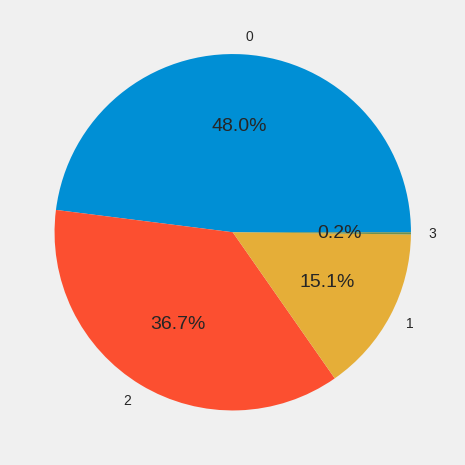

In [ ]:
import matplotlib.pyplot as plt

label_counts = MKCR_E_df['label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.show()

In [ ]:
# Display results using Pandas
from IPython.display import display

# Calculate and store the EKEZ_2 cluster means
ekez2_cluster_means = EKEZ_2_label_df.groupby('label').mean()

print("EKEZ_2 Cluster Means:")
display(ekez2_cluster_means)


print("Variable Importance Comparison:")
display(pd.DataFrame(importance_vectors, index=df_numeric.columns))

print("Cosine Similarity:")
display(pd.DataFrame(cosine_similarity_values, index=importance_vectors.keys(), columns=importance_vectors.keys()))

print("Outlier Clusters:")
display(outlier_df)

EKEZ_2 Cluster Means:


,SALES3,Tree_Imputed_SALES1,Tree_Imputed_SALES2,Tree_Imputed_NETPROF1,Tree_Imputed_NETPROF2,Tree_Imputed_NETPROF3,Tree_Imputed_ASSETS1,Tree_Imputed_ASSETS2,Tree_Imputed_SALEPER1,Tree_Imputed_EQUITY1,Tree_Imputed_EQUITY2,Tree_Imputed_EMPLOY1,Tree_Imputed_EMPLOY2,Tree_Imputed_PROFPER,Tree_Imputed_MARKTCAP,Tree_Imputed_PROFTAS1,Tree_Imputed_PROFTAS2,Tree_Imputed_PROFTAS3
label,,,,,,,,,,,,,,,,,,
0,241.141892,10509.723986,7.571368,252.967331,49.823799,211.075759,11524.502525,190.557324,0.935338,3584.964253,188.134119,28568.031351,227.233602,60321.446183,8447.346931,6.477776,4.447012,10.613612
1,609.548295,2311.110369,5.257863,19.371985,39.426653,583.482502,1999.473289,584.778430,1.754108,526.077535,582.572885,4147.815113,606.524770,22909.564056,1123.865993,1.586626,2.510527,16.364227


Variable Importance Comparison:


NameError: name 'importance_vectors' is not defined

In [ ]:
# Display results using Pandas
from IPython.display import display

# Calculate and store the EKEZ_2 cluster means
ekez2_cluster_means = EKEZ_2_label_df.groupby('label').mean()

print("EKEZ_2 Cluster Means:")
display(ekez2_cluster_means)

# Initialize importance_vectors (replace with your actual calculation)
# Assuming importance_vectors is a dictionary where keys are cluster names and values are feature importance arrays
importance_vectors = {
    'LKER_E': RF_LKER_Kmeans.feature_importances_,
    'EKEZ_2': RF_EKEZ_Kmeans.feature_importances_,
    'MRMR_4': RF_MRMR_Kmeans.feature_importances_  # Assuming MRMR_4 is the correct name
    # Add other cluster names and their importance vectors as needed
}

# Assuming df_numeric is your DataFrame containing the numeric features
df_numeric = Tree_impute_df  # Or Ridge_impute_df, depending on your data

print("Variable Importance Comparison:")
display(pd.DataFrame(importance_vectors, index=df_numeric.columns))

#Initialize cosine_similarity_values (replace with your actual calculation)
# # Assuming you are using sklearn.metrics.pairwise.cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_values = cosine_similarity(list(importance_vectors.values()))

print("Cosine Similarity:")
display(pd.DataFrame(cosine_similarity_values, index=importance_vectors.keys(), columns=importance_vectors.keys()))

# # Assuming outlier_df is a DataFrame containing information about outlier clusters
outlier_df = pd.DataFrame() #Replace with your outlier data

print("Outlier Clusters:")
display(outlier_df)

EKEZ_2 Cluster Means:


,SALES3,Tree_Imputed_SALES1,Tree_Imputed_SALES2,Tree_Imputed_NETPROF1,Tree_Imputed_NETPROF2,Tree_Imputed_NETPROF3,Tree_Imputed_ASSETS1,Tree_Imputed_ASSETS2,Tree_Imputed_SALEPER1,Tree_Imputed_EQUITY1,Tree_Imputed_EQUITY2,Tree_Imputed_EMPLOY1,Tree_Imputed_EMPLOY2,Tree_Imputed_PROFPER,Tree_Imputed_MARKTCAP,Tree_Imputed_PROFTAS1,Tree_Imputed_PROFTAS2,Tree_Imputed_PROFTAS3
label,,,,,,,,,,,,,,,,,,
0,241.141892,10509.723986,7.571368,252.967331,49.823799,211.075759,11524.502525,190.557324,0.935338,3584.964253,188.134119,28568.031351,227.233602,60321.446183,8447.346931,6.477776,4.447012,10.613612
1,609.548295,2311.110369,5.257863,19.371985,39.426653,583.482502,1999.473289,584.778430,1.754108,526.077535,582.572885,4147.815113,606.524770,22909.564056,1123.865993,1.586626,2.510527,16.364227


Variable Importance Comparison:


,LKER_E,EKEZ_2,MRMR_4
SALES3,0.097552,0.029476,0.051107
Tree_Imputed_SALES1,0.100126,0.024669,0.056132
Tree_Imputed_SALES2,0.012102,0.007371,0.009329
Tree_Imputed_NETPROF1,0.019549,0.047395,0.020093
Tree_Imputed_NETPROF2,0.009384,0.006454,0.009340
Tree_Imputed_NETPROF3,0.030952,0.078060,0.027638
Tree_Imputed_ASSETS1,0.076579,0.057315,0.116763
Tree_Imputed_ASSETS2,0.099525,0.102009,0.146442
Tree_Imputed_SALEPER1,0.021822,0.006907,0.017729
Tree_Imputed_EQUITY1,0.084768,0.143309,0.110790


Cosine Similarity:


,LKER_E,EKEZ_2,MRMR_4
LKER_E,1.000000,0.745972,0.908899
EKEZ_2,0.745972,1.000000,0.874670
MRMR_4,0.908899,0.874670,1.000000


Outlier Clusters:


""
